# One Variable Equations

Throughout this section and the next ones we shall cover the topic of solutions to one variable equations. Many different problems in physics and astronomy require the use of complex expressions, even with implicit dependence of variables. When it is necessary to solve for one of those variable, an analytical approach is not usually the best solution, because of its complexity or even because it does not exist at all. Different approaches for dealing with this comprehend series expansions and numerical solutions. Among the most widely used numerical approaches are the Bisection or Binary-search method, fixed-point iteration, Newton's methods.


- - -
- [Bisection Method](#Bisection-Method) 
    - [Steps](#Steps-BM)
    - [Stop condition](#Stop-condition-BM)
    - [Error analysis](#Error-analysis-BM)
    - [Example 1](#Example-1)
    - [Example 2](#Example-2)
- [Fixed-point Iteration](#Fixed-point-Iteration)
    - [Steps](#Steps-FP)
    - [Example 3](#Example-3)
    - [Stop condition](#Stop-condition-FP)
    - [Example 4](#Example-4)
    - [Activity](#ACTIVITY-FP)
- [Newton-Raphson Method](#Newton-Raphson-Method)
    - [Derivation](#Derivation-NM)
    - [Steps](#Steps-NM)
    - [Example 5](#Example-5)
    - [Stop condition](#Stop-condition-NM)
    - [Convergence](#Convergence-NM)
- [Secant Method](#Secant-Method)
    - [Derivation](#Derivation-SM)
    - [Steps](#Steps-SM)

- - -

In [1]:
import numpy as np
%pylab inline
import matplotlib.pyplot as plt
# JSAnimation import available at https://github.com/jakevdp/JSAnimation
from JSAnimation import IPython_display
from matplotlib import animation
from scipy import integrate
from scipy import optimize

Populating the interactive namespace from numpy and matplotlib


- - - 

# Bisection Method

The Bisection method exploits the [intermediate value theorem](http://en.wikipedia.org/wiki/Intermediate_value_theorem), where a continuous and differentiable function $f$ must have a zero between an interval $[a,b]$ such that $f(a)f(b)<0$, or equivalently, there must be a value $p\in[a,b]$ such that $f(p)=0$. Below the algorithmm is stated explicitly.

## Steps BM

<div style="float: right;" markdown="1">
    <img src="http://upload.wikimedia.org/wikipedia/commons/thumb/8/8c/Bisection_method.svg/300px-Bisection_method.svg.png">
</div>


1. There must be selected two values $a$ and $b$ such that $f(a)f(b)<0$ and $p\in[a,b]$ where $f(p)=0$. In other words, though we do not know the value of the root, we must know that there is at least one within the selected interval.

2. To begin, it must be set $a_1=a$ and $b_1=b$.

3. Calculate the mid-point $p_1$ as

    $$p_1 = a_1 + \frac{b_1-a_1}{2} = \frac{a_1+b_1}{2}$$

4. Evaluate the function in $p_1$, if the [stop condition](#Stop-Condition) is true, go to step 6.

5. If the [stop condition](#Stop-Condition) is not satisfied, then:

    1. If $f(p_1)f(a_1) > 0$, $p\in(p_1,b_1)$. Then set $a_2=p_1$ and $b_2=b_1$

    2. If $f(p_1)f(a_1) < 0$, $p\in(a_1,p_1)$. Then set $a_2=a_1$ and $b_2=p_1$

    3. Go to step 3 using $p_2$, $a_2$ and $b_2$ instead of $p_1$, $a_1$ and $b_1$. For next iterations the index increases until the [stop condition](#Stop-Condition) is reached.

6. The End!

## Stop condition BM

There are several different stop conditions for this algorithm. The most used are stated below:

* A fixed distance between the last two steps (absolute convergence):

    $$|p_i - p_{i-1}|<\epsilon$$

* A fixed relative distance between the last two steps (relative convergence):

    $$\frac{|p_i - p_{i-1}|}{|p_i|}<\epsilon\ \ \ \ \ p_i \neq 0$$

* Function tolerance:

    $$f(p_i)< \epsilon$$

All these conditions should lead to a desired convergence expressed by the $\epsilon$ value. However, the first and the third conditions present some problems when the function has a derivative very large or close to $0$ as evaluated in the root value. When the function is very inclined, the first condition fails as a convergence in the $x$ axis does not guarantee a convergence in the $y$ axis, so the found root $p$ may be far from the real value. When the function is very flat ($dF/dx\rightarrow 0$), the third condition fails due to an analogous reason.

A final stop condition that does not have mathematical motivation yet computational is a maximum number of allowed iterations. This condition should be used not only for this algorithm but for all iteration-based numerical methods. This condition guarantees a finite computing time and prevents undesired infinite bucles.

* If $N>N_{max}$, stop!

## Error analysis BM

If we suppose $f\in C[a,b]$ and $f(a)f(b)<0$, the Bisection method generates a sequence of numbers $\left\{p_i\right\}_{i=1}^\infty$ approximating a root $p$ of $f$ as:

$$|p_i-p|\leq \frac{b-a}{2^n},\ \ \ \ \ i\geq 1$$

From this, we can conclude the convergence rate of the method is

$$p_i = p + \mathcal{O}\left( \frac{1}{2^i} \right)$$

This expression allows us to estimate the maximum number of required iterations for achieving a desired precision. The next figure sketches the number of iterations required for some precision.

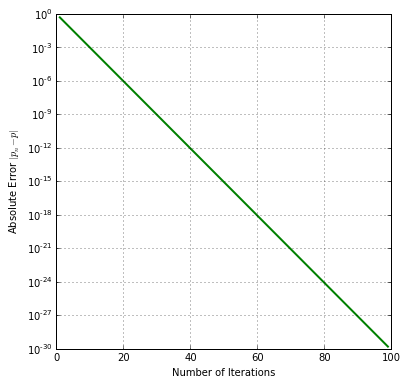

In [2]:
#Array of iterations
Niter = np.arange( 1, 100, 1 )

plt.figure( figsize=(6,6) )
plt.semilogy( Niter, 2.0**-Niter, color="green", lw = 2 )
plt.grid(True)
plt.xlabel("Number of Iterations")
plt.ylabel("Absolute Error $|p_n-p|$")

## Example 1

Find the root of the function $f$

$f(x) = x^3 - 2$

for $20$ iterations, show the result and the relative error in each iteration.

In [3]:
#Defining Bisection function
def Bisection( f, a, b, Nmax, printer=False ):
    #verifying the STEP1, a and b with different signs
    if f(a)*f(b)>0:
        print "Error, f(a) and f(b) should have opposite signs"
        return False
    #Assigning the current extreme values, STEP2
    ai = a
    bi = b
    #Iterations
    n = 1
    while n<=Nmax:
        #Bisection, STEP3
        pi = (ai+bi)/2.0
        #Evaluating function in pi, STEP4 and STEP5
        if printer:
            print "Value for %d iterations:"%(n),pi
        #Condition A
        if f(pi)*f(ai)>0:
            ai = pi
        #Condition B
        elif f(pi)*f(ai)<0:
            bi = pi
        #Condition C: repeat the cycle
        n+=1
    #Final result
    return pi

In [4]:
#Defining function
def function(x):
    f = x**3.0 - 2.0
    return f

#Finding the root of the function. The real root is 2**(1/3), so a & b should enclose this value
a = 0.0
b = 2.0
Nmax = 20

result = Bisection(function, a, b, Nmax, True)
print "Real value:", 2**(1/3.0)
print "Absolute error", abs((2**(1/3.0)-result))

Value for 1 iterations: 1.0
Value for 2 iterations: 1.5
Value for 3 iterations: 1.25
Value for 4 iterations: 1.375
Value for 5 iterations: 1.3125
Value for 6 iterations: 1.28125
Value for 7 iterations: 1.265625
Value for 8 iterations: 1.2578125
Value for 9 iterations: 1.26171875
Value for 10 iterations: 1.259765625
Value for 11 iterations: 1.2607421875
Value for 12 iterations: 1.26025390625
Value for 13 iterations: 1.26000976562
Value for 14 iterations: 1.25988769531
Value for 15 iterations: 1.25994873047
Value for 16 iterations: 1.25991821289
Value for 17 iterations: 1.25993347168
Value for 18 iterations: 1.25992584229
Value for 19 iterations: 1.25992202759
Value for 20 iterations: 1.25992012024
Real value: 1.25992104989
Absolute error 9.29655615378e-07


Using the error analysis, we can predict the produced error at $20$ iterations by computing:

$$ \left( \frac{1}{2^{20}}\right) \approx 9.53674316\times 10^{-7} $$

This value is very close to the obtained relative error.

If we were interested in a double precision, i.e. $\epsilon \sim 10^{-17}$, the number of required iterations would be:

$$ 10^{-17} = \left( \frac{1}{2^{N}}\right) \longrightarrow N = \frac{17}{\log_{10}(2)} \approx 56 $$

### <font color='red'> ACTIVITY </font>

<font color='red'>
In an IPython notebook, copy the last function and find the first solution to the equation
    
$ 7 = \sqrt{x^2+1}+e^x\sin x $
    
CLUE: this solution is within the interval $[0,2]$.
</font>

## Example 2

In orbital mechanics, when solving the central-force problem it becomes necessary to solve the Kepler's equation. This is a transcendental equation that relates the orbital parameters of the trajectory.

*Kepler equation:* $M = E - \epsilon \sin E$

where $M$ is the mean anomaly, $E$ the eccentric anomaly and $\epsilon$ the eccentricity. The mean anomaly can be computed with the expression

$$M = n\ t = \sqrt{ \frac{GM}{a^3} } t$$

where $n$ is the mean motion, $G$ the gravitational constant, $M$ the mass of the central body and $a$ the semi-major axis. $t$ is the time where the position in the trajectory will be computed.

The coordinates $x$ and $y$ as time functions can be recovered by means of the next expressions

$$x(t) = a(\cos E - \epsilon)$$

$$y(t) = b\sin E$$

where $b = a \sqrt{1-\epsilon^2}$ is the semi-minor axis of the orbit and the implicit time-dependence of the eccentric anomaly $E$ is computed through the Kepler's equation.

**Problem:**

For a stallite orbiting the earth in a equatorial trajectory with eccentricity $\epsilon = 0.5$ at a geostationary distance for the semi-major axis, tabulate the positions $x$ and $y$ within the orbital plane in intervals of $15$ min during $5$ hours.

**Parameters:**

- $\epsilon = 0.5$

- $a = 35900$ km

- $G = 6.67384 \times 10^{-11}$ m$^3$ kg$^{-1}$ s$^{-2}$

- $M_{\oplus} = 5.972\times 10^{24}$ kg

In [5]:
#====================================================================
#Parameters
#====================================================================
#Eccentricity
eps = 0.5
#Semi-major axis    [m]
a = 35900e3
#Gravitational constant    [m3kg-1s-2]
GC = 6.67384e-11
#Earth mass    [kg]
Me = 5.972e24

#Semi-minor axis    [m]
b = a*(1-eps**2.0)**0.5
#Mean motion
n = ( GC*Me/a**3.0 )**0.5

#Hour to Second
HR2SC = 3600.
#Initial time    [hr]
t0 = 0*HR2SC
#Final time    [hr]
tf = 5*HR2SC
#Time step    [hr]
tstep = 0.25*HR2SC
#Number of maxim iterations
Niter = 56
#Root interval
a0 = -10
b0 = 10

#====================================================================
#Kepler Function
#====================================================================
def kepler( E ):
    func = E - eps*np.sin(E) - n*t
    return func

#====================================================================
#Position function
#====================================================================
def r(E):
    x = a*(np.cos(E)-eps)
    y = b*np.sin(E)
    return [x/1.e3, y/1.e3]

In 0.000000 hours, the satellite is located at (17950.000000,0.000000) km
In 0.250000 hours, the satellite is located at (17454.741542,5146.426647) km
In 0.500000 hours, the satellite is located at (16033.097675,10023.437750) km
In 0.750000 hours, the satellite is located at (13848.847528,14430.262364) km
In 1.000000 hours, the satellite is located at (11104.379909,18261.701894) km
In 1.250000 hours, the satellite is located at (7989.437466,21493.410338) km
In 1.500000 hours, the satellite is located at (4657.168469,24151.489610) km
In 1.750000 hours, the satellite is located at (1221.066166,26286.121177) km
In 2.000000 hours, the satellite is located at (-2238.747501,27954.872718) km
In 2.250000 hours, the satellite is located at (-5667.264143,29214.008624) km
In 2.500000 hours, the satellite is located at (-9027.373694,30114.739827) km
In 2.750000 hours, the satellite is located at (-12294.392344,30702.085866) km
In 3.000000 hours, the satellite is located at (-15452.164136,31014.965

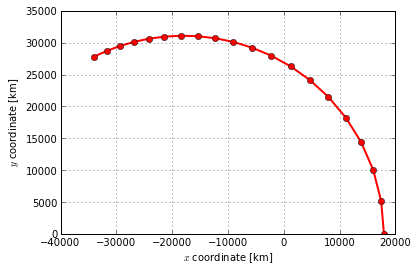

In [6]:
#====================================================================
#Solving for different times
#====================================================================
#Time array
times = np.arange( t0, tf, tstep )

rpos = []
for t in times:
    #Finding the new eccentric anomaly
    E = Bisection( kepler, a0, b0, Niter )
    #Computing coordinates at this time
    ri = r(E)
    print "In %f hours, the satellite is located at (%f,%f) km"%(t/HR2SC, ri[0], ri[1])
    rpos.append( ri )
rpos = np.array(rpos)    

#Plotting
plt.plot( rpos[:,0], rpos[:,1], "o-", color="red", lw = 2 )
plt.grid(True)
plt.xlabel("$x$ coordinate [km]")
plt.ylabel("$y$ coordinate [km]")

- - - 

# Fixed-point Iteration

Although in many cases the use of Bisection is more than enough, there are some pathological situations where the use of more advanced methods is required.
One of the advantages featured by this method is one does not have to give an interval where the solution is within, instead, from a seed the algorithm will converge towards the required solution.

## Steps FP

1. Take your function $f(x)$ and rewrite it like 

    $f(x) = x - g(x)$

2. Give a guest to the solution (root of $f(x)$). This value would be the seed $p_0$.
3. The next guest to the solution will be given by

    $p_2 = g(p_1)$

4. If the stop condition is not satisfied, then repeat step 3.
5. The End!

In [6]:
#Defining Fixed-point iteration function
def FixedPoint_Animation( f, pini, Nmax, xmin, xmax ):
    g = lambda x: x-f(x)
    #Initial condition
    pi = [pini,]
    px = [pini,pini,]
    py = [0,]
    #Iterations
    for n in xrange(Nmax+3):
        pi.append( g(pi[n]) )
        px.append( g(pi[n]) )
        px.append( g(pi[n]) )
        py.append( g(pi[n]) )
        py.append( g(pi[n]) )
    
    py.append( g(pi[n+1]) )
    pi = np.array( pi )
    px = np.array( px )
    py = np.array( py )
    
    print "Result:", pi[-1]
    
    #Array X-axis
    X = np.linspace(xmin,xmax,100)
    
    #Initializing Figure
    fig = plt.figure( figsize=(7,7) )
    ax = fig.add_subplot(111)
    #Graphic iterations
    fixedpoint, = ax.plot( [], [], color="red", linewidth = 3 )
    #Function g
    ax.plot( X, g(X), color="green", linewidth = 2 )
    #Identity funcion
    ax.plot( X, X, color="blue", linewidth = 2 )
    ax.grid(True)
    ax.set_xlim( (xmin, xmax) )
    ax.set_ylim( (xmin, xmax) )
    ax.set_xlabel( "X axis" )
    ax.set_ylabel( "Y axis" )
    ax.set_title( "Fixed-Point iteration" )
        
    def init():
        fixedpoint.set_data([], [])
        return fixedpoint,
    
    def animate(i):
        #Setting new data
        fixedpoint.set_data( px[:2*i], py[:2*i] )
        ax.set_title( "Fixed-Point. Iteration %d"%i )
        return fixedpoint,
    
    return animation.FuncAnimation(fig, animate, init_func=init,frames=Nmax, interval=500, blit=True)

## Example 3

Find the roots of the next functions:

$$f_1(x) = \frac{x^2-1}{3}$$

and 

$$f_2(x) = x-\cos x$$

using Fixed-Point iteration.

Result: 0.999999989073



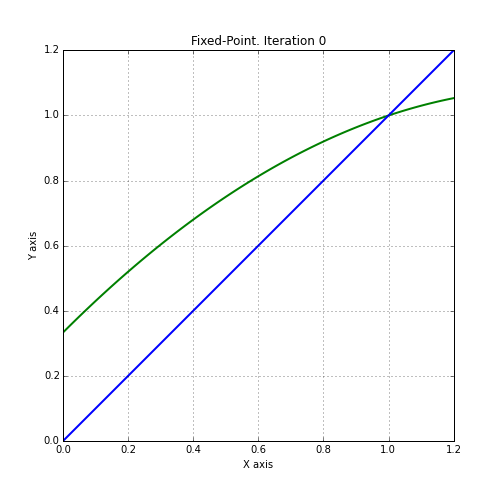
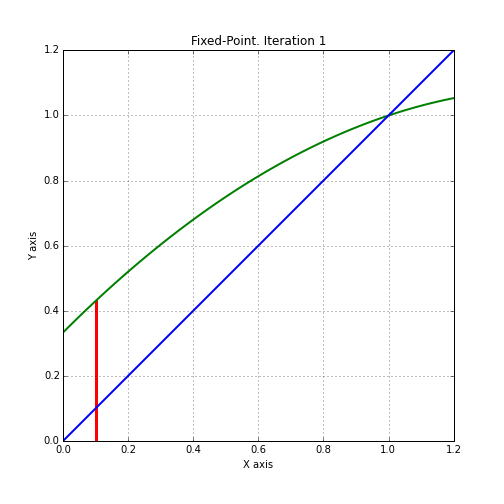
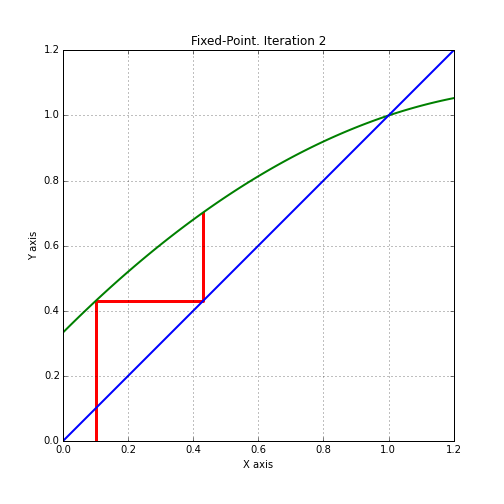
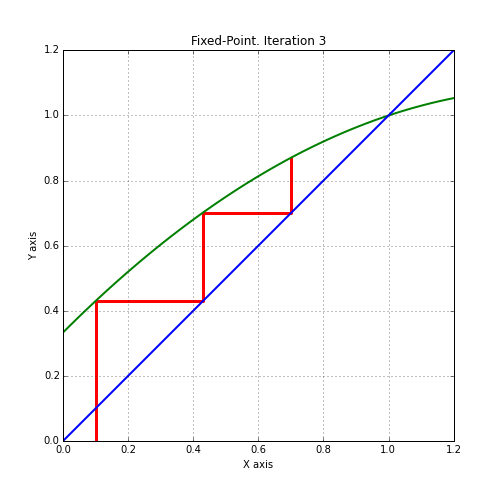
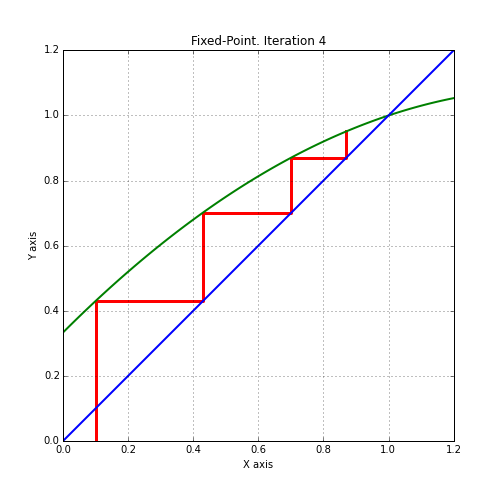
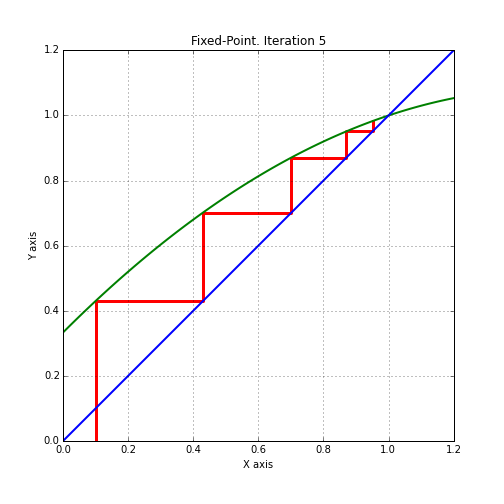
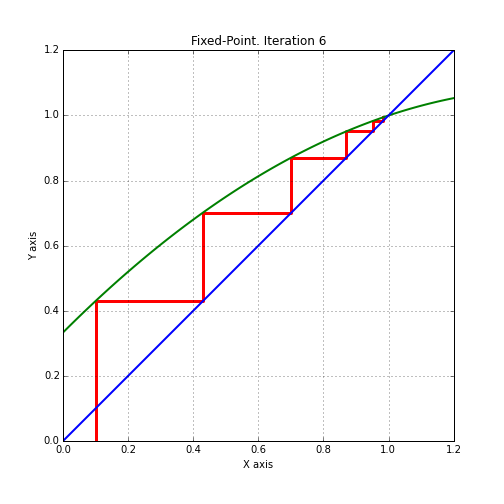
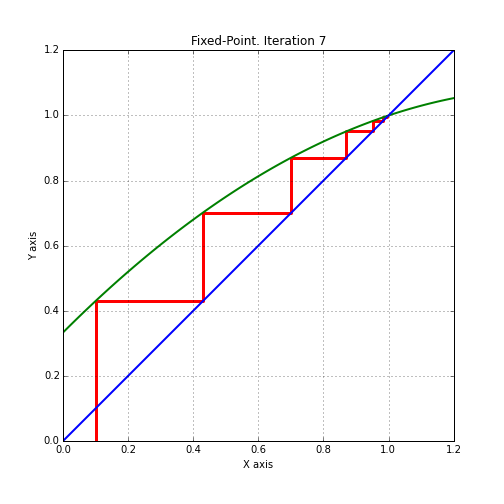
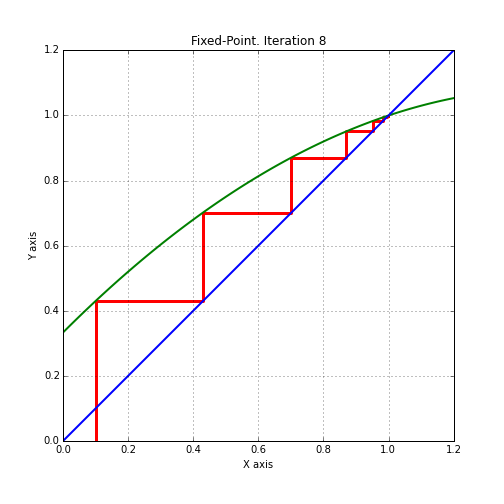
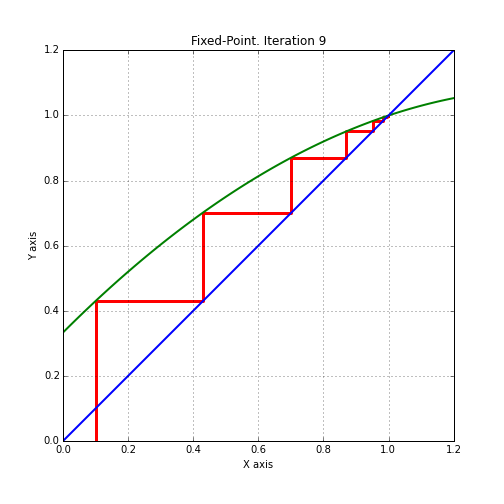
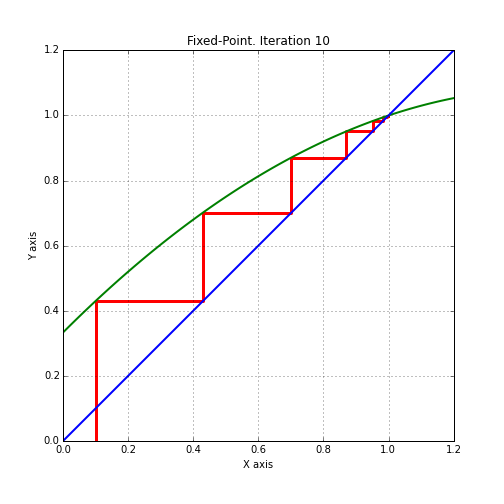
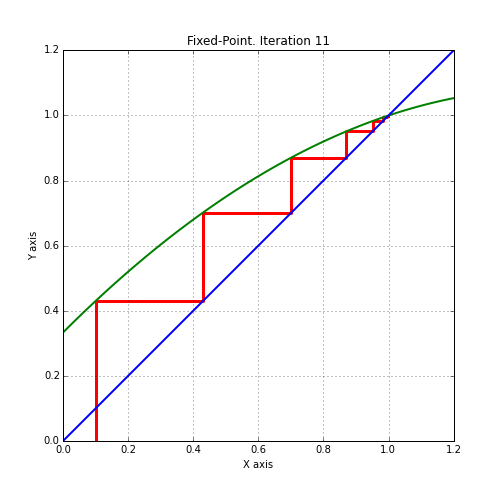
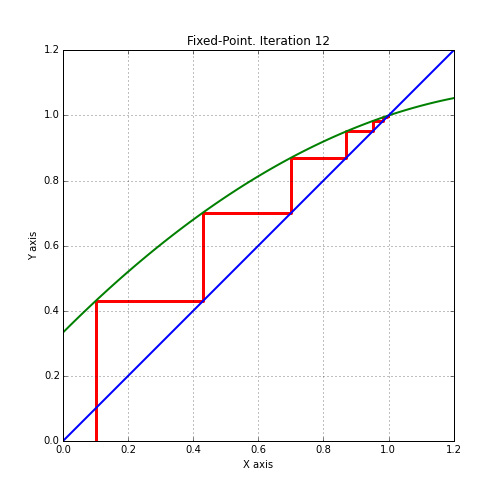
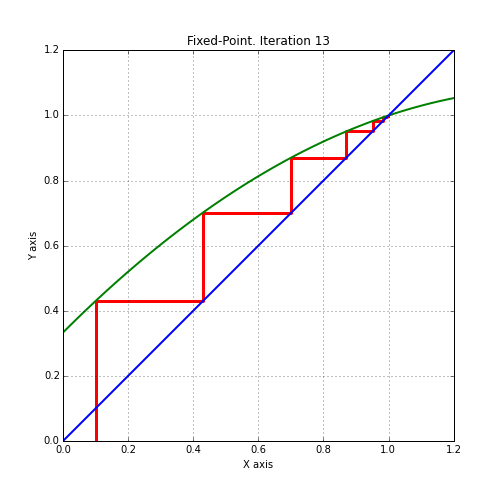
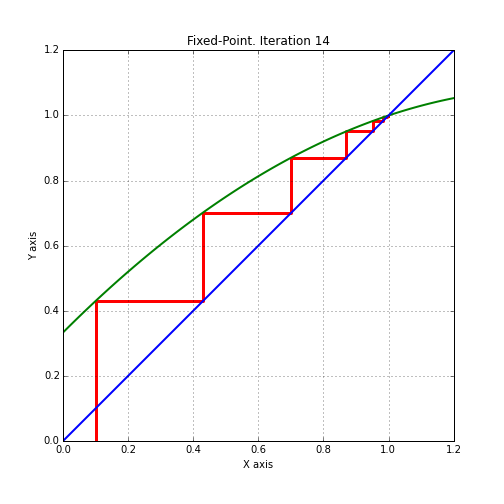

In [7]:
def f1(x):
    return (x**2-1)/3.0
FixedPoint_Animation( f1, pini = 0.1, Nmax = 15, xmin = 0, xmax = 1.2 )

Result: 0.738784510593



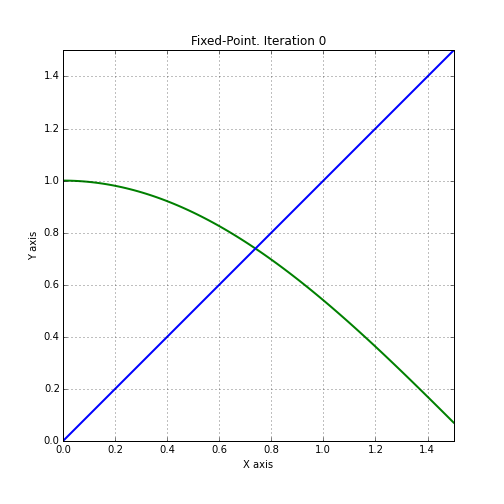
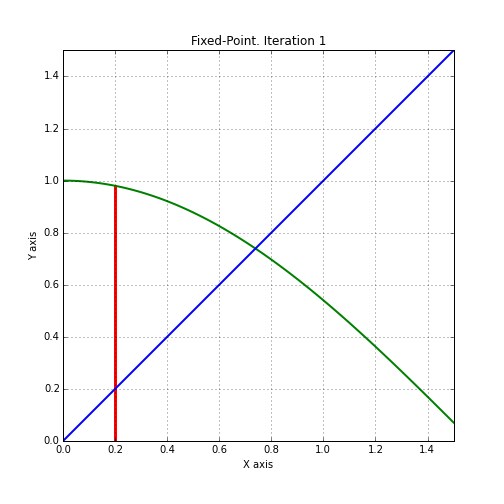
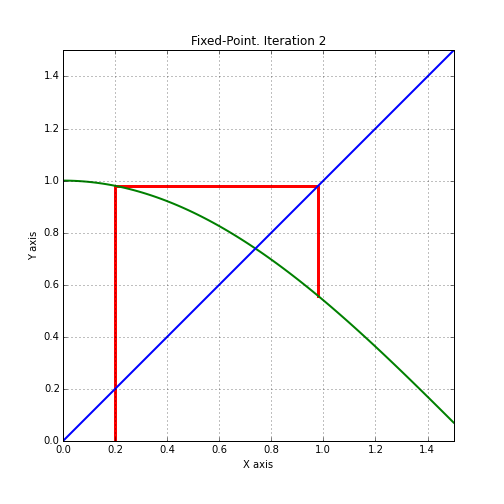
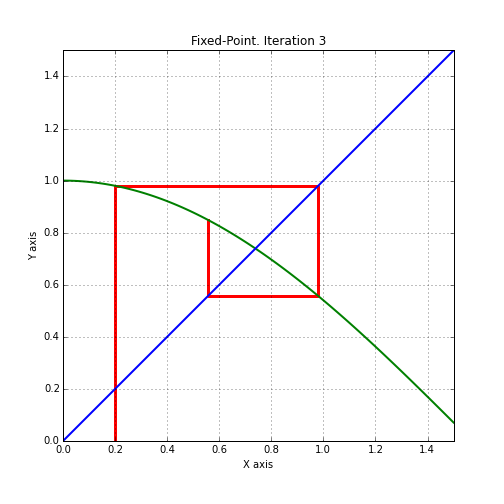
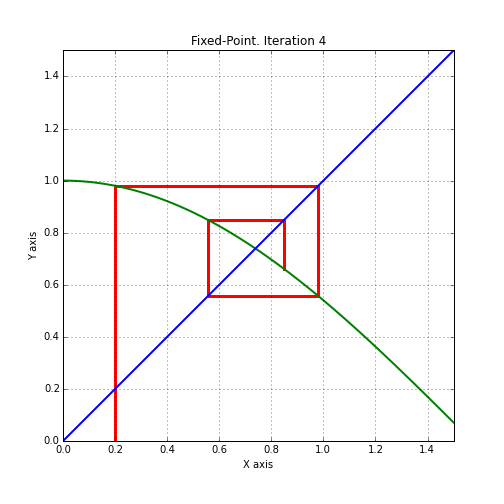
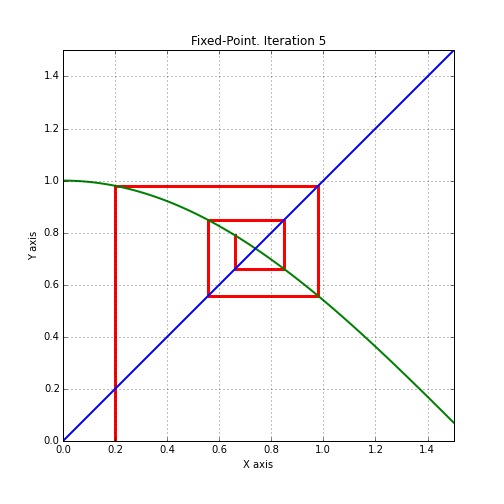
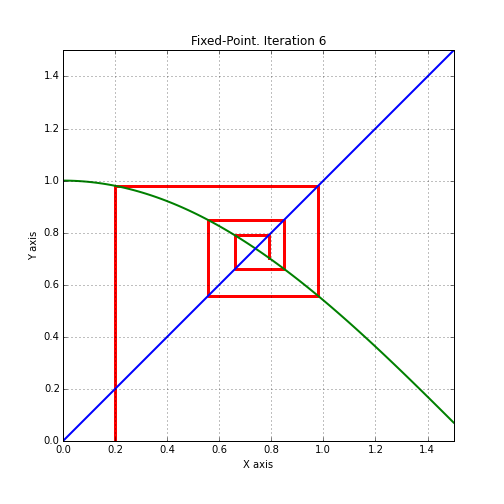
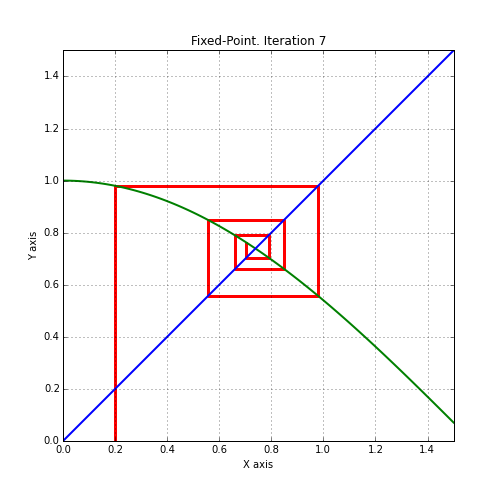
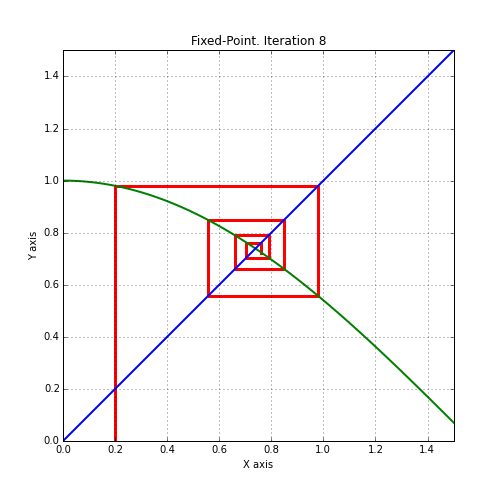
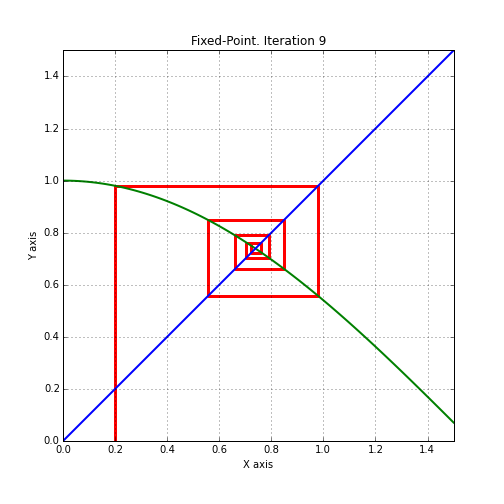
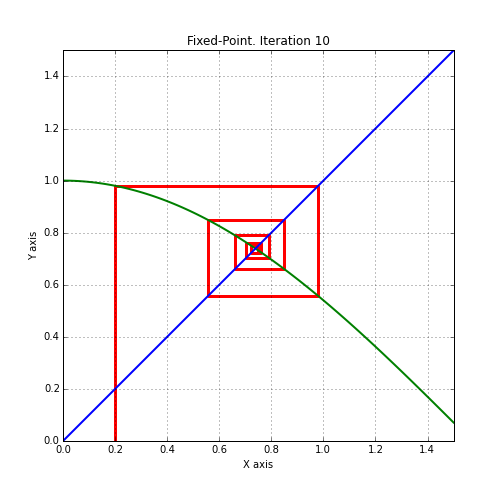
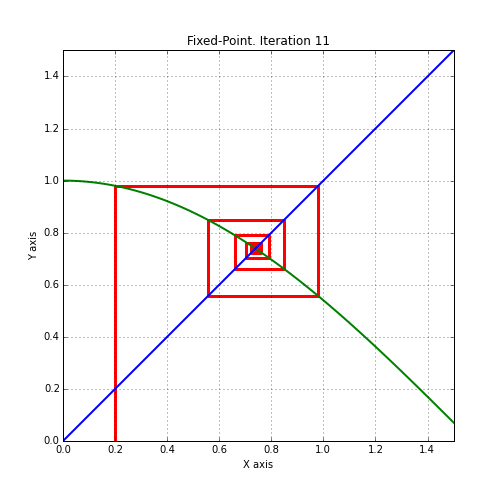
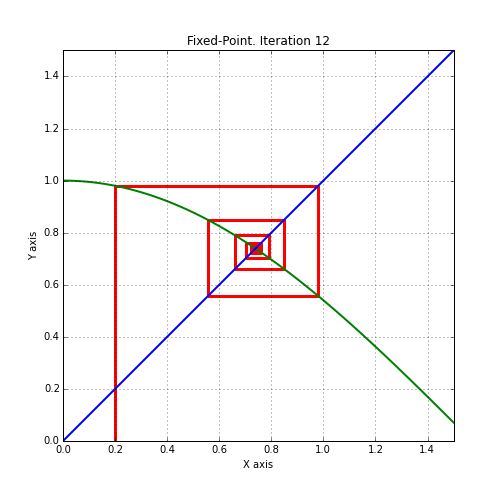
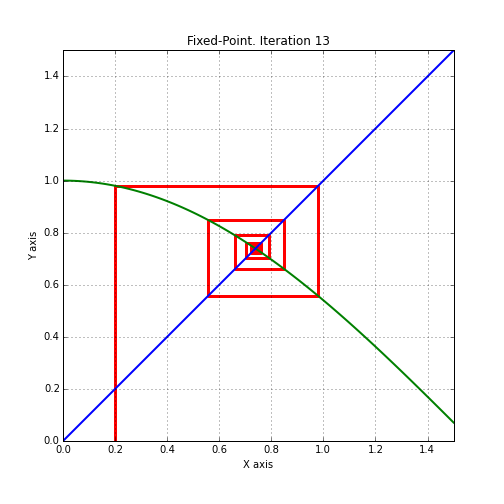
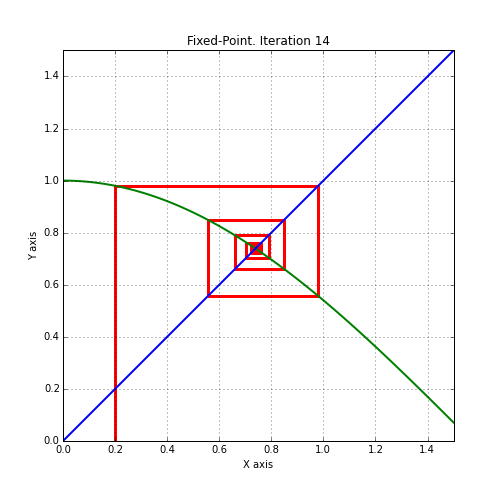

In [8]:
def f2(x):
    return x-np.cos(x)
FixedPoint_Animation( f2, pini = 0.2, Nmax = 15, xmin = 0, xmax = 1.5 )

## Stop conditions FP

The stop conditions are the same than Bisection:

* A fixed distance between the last two steps (absolute convergence):

    $$|p_i - p_{i-1}|<\epsilon$$

* A fixed relative distance between the last two steps (relative convergence):

    $$\frac{|p_i - p_{i-1}|}{|p_i|}<\epsilon\ \ \ \ \ p_i \neq 0$$

* Function tolerance:

    $$f(p_i)< \epsilon$$

* Computational stop:

    If $N>N_{max}$, stop!

## Example 4

There is a type of functions whose roots coincides with a local or global minima or maxima. This condition implies the function does not cross the x-axis at the root and the problem cannot be solved by using Bisection as the criterion of different signs cannot be satisfied. Fixed-point iteration is a more feasible alternative when solving these problems.

As an example, here we shall solve the roots of the function

$f(x) = x^2\cos(2x)$

For this, we plot the function first:

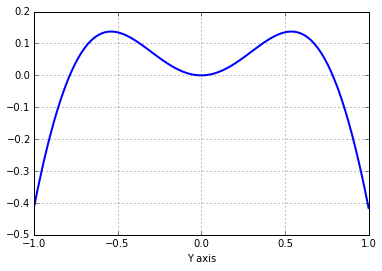

In [9]:
def f(x):
    return x**2*np.cos(2*x)

X = np.linspace(-1,1,100)
plt.plot( X, f(X), lw=2 )
plt.xlabel("X axis")
plt.xlabel("Y axis")
plt.grid(True)

It is clear there are three root within the plotted interval, i.e. $x_0 = -\pi/4$, $x_1 = 0$ and $x_2 = \pi/4$. Using bisection for the first and third roots we obtain:

In [10]:
#Root 0
print "Root x_0", Bisection( f, a=-1, b=-0.5, Nmax=56 )
#Root 2
print "Root x_2", Bisection( f, a=0.5, b=1, Nmax=56 )

Root x_0 -0.785398163397
Root x_2 0.785398163397


However, when applying bisection to the middle root, we obtain:

In [11]:
#Root 1
print "Root x_1", Bisection( f, a=-0.5, b=0.5, Nmax=56 )
print "Root x_1", Bisection( f, a=-0.5, b=1.0, Nmax=56 )

Root x_1 Error, f(a) and f(b) should have opposite signs
False
Root x_1 0.785398163397


Now, applying Fixed-point iteration:

Result: 0.0173175686816



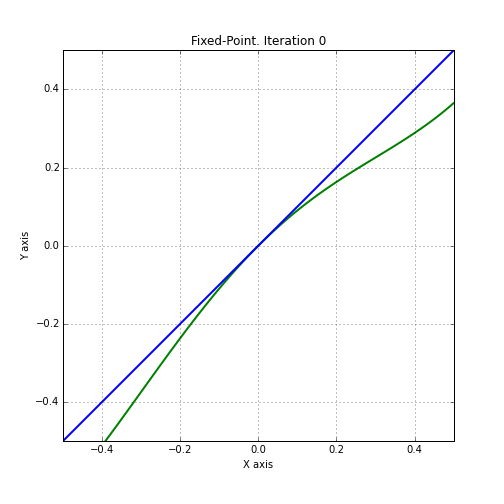
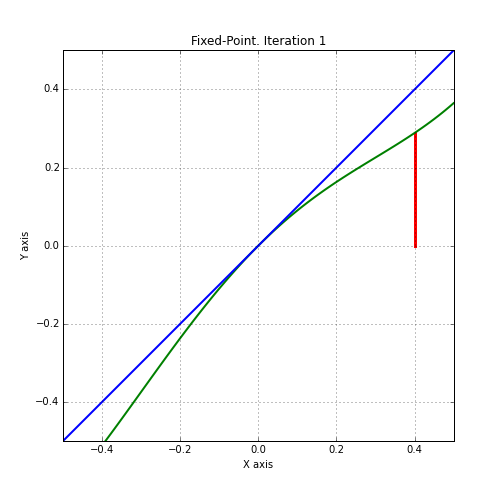
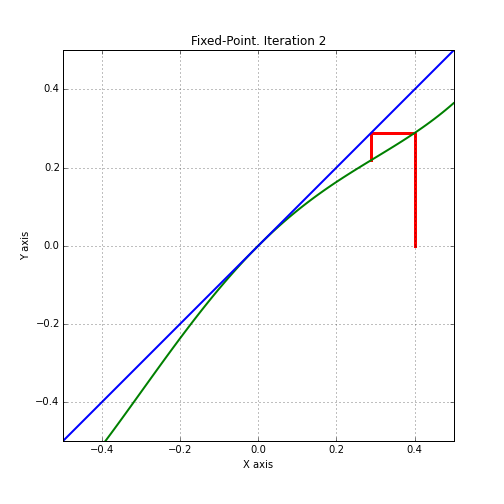
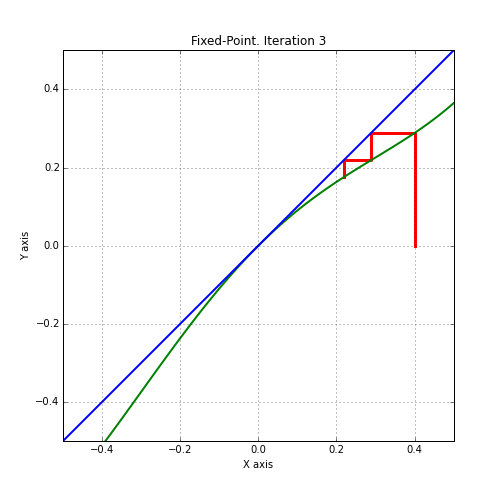
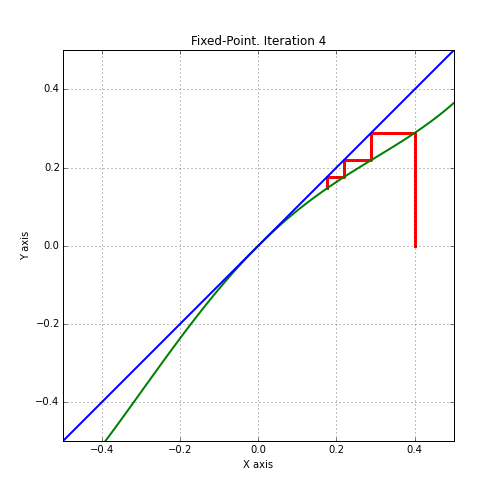
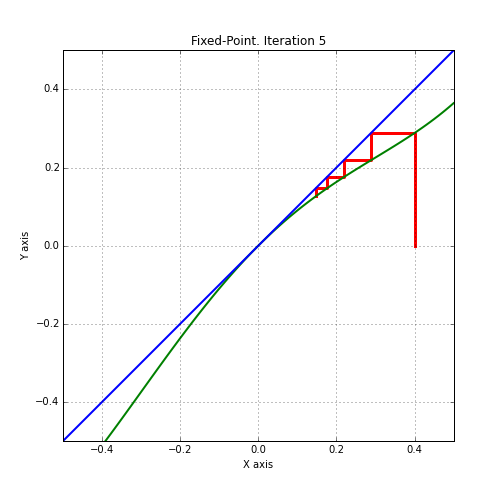
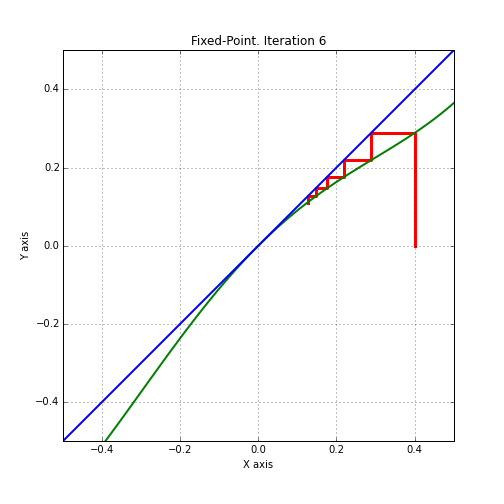
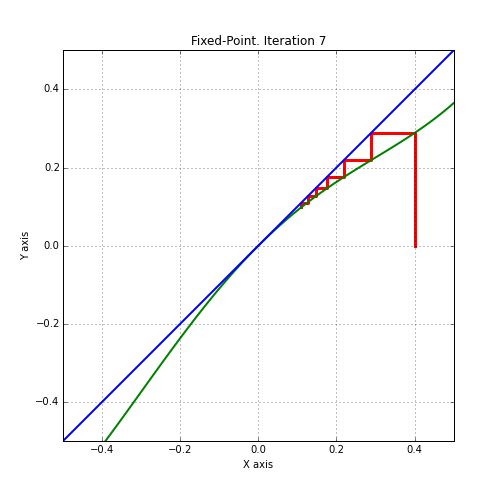
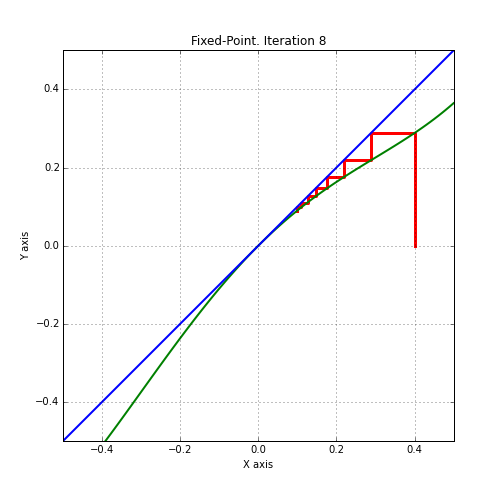
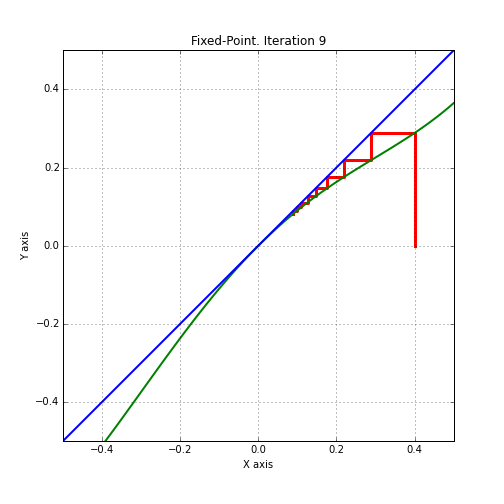
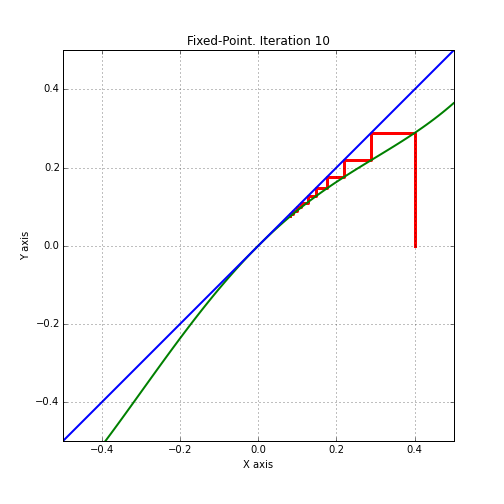
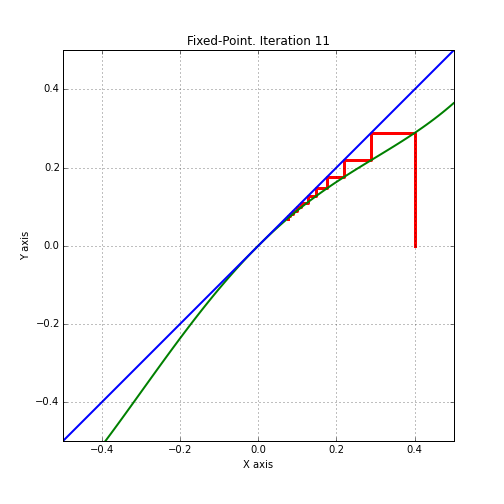
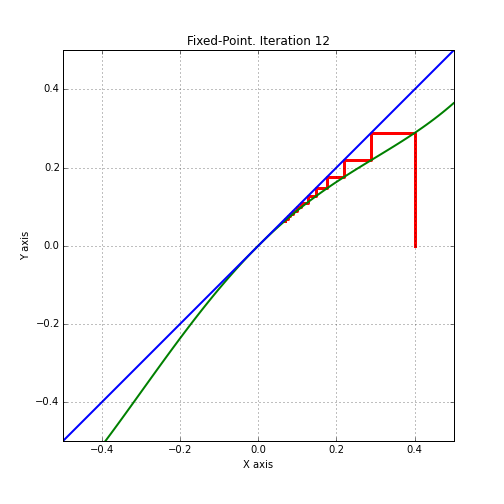
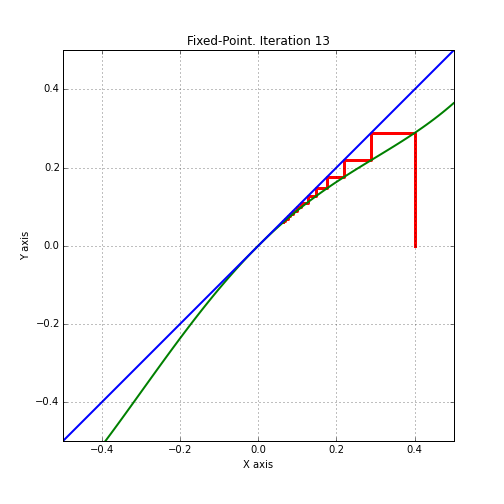
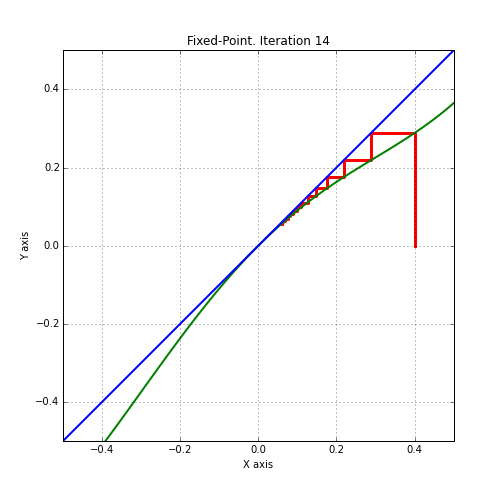
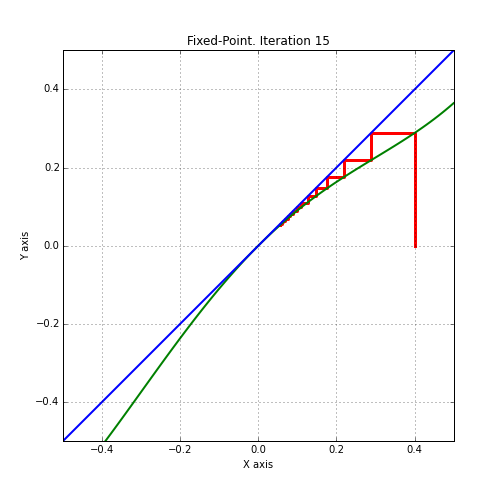
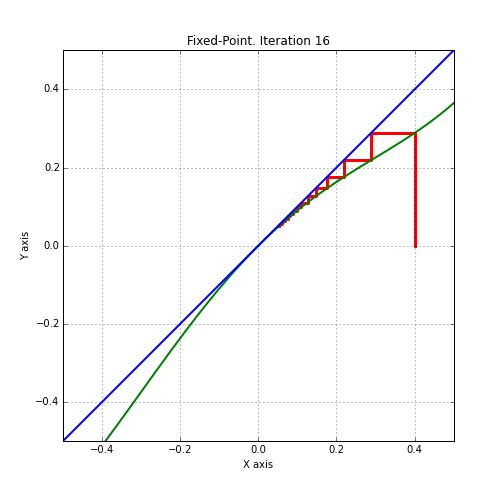
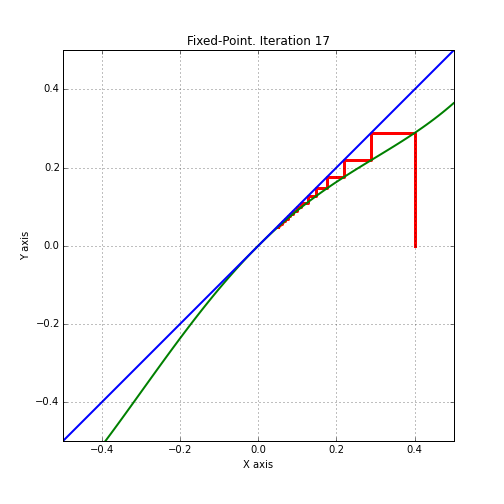
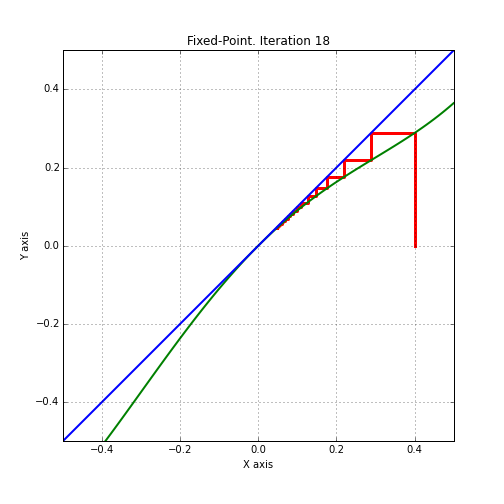
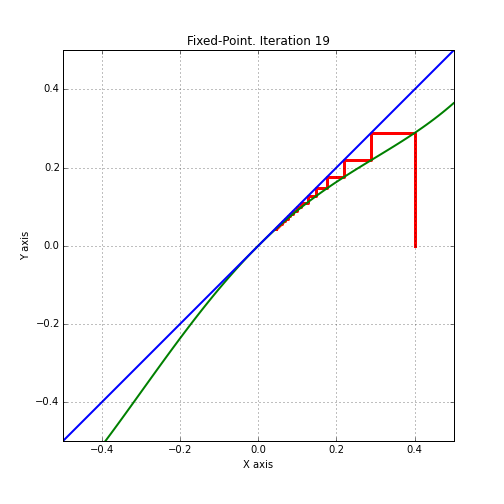
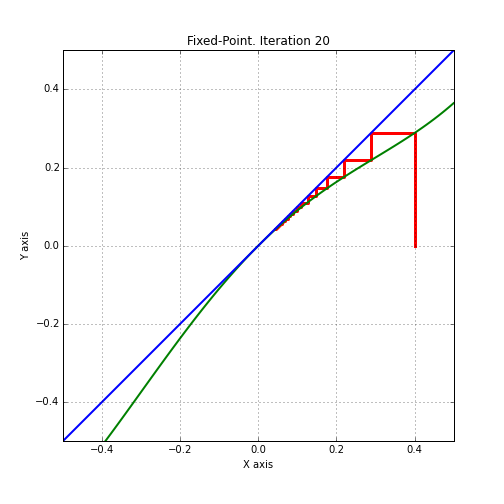
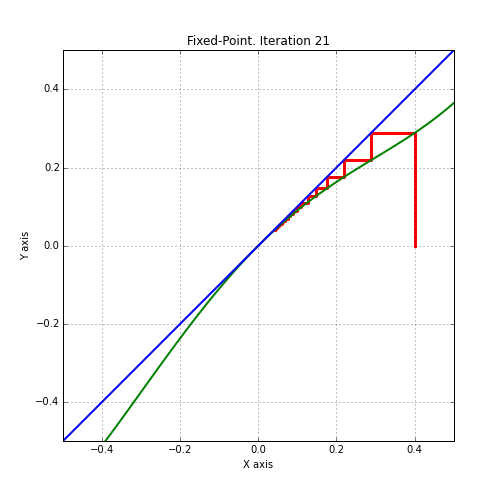
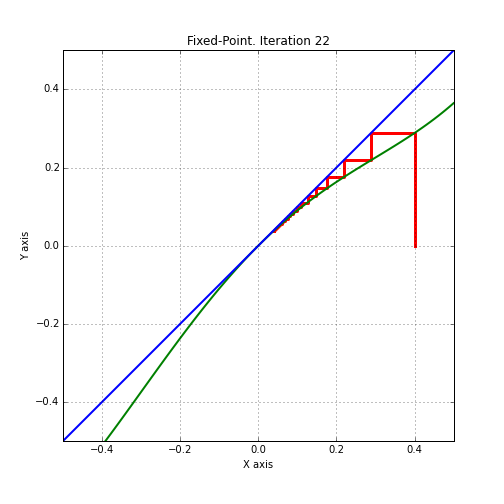
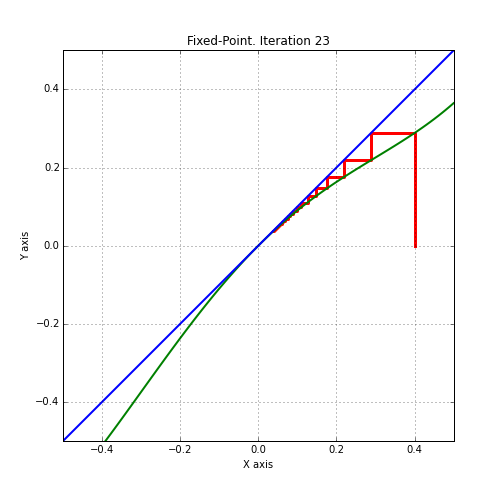
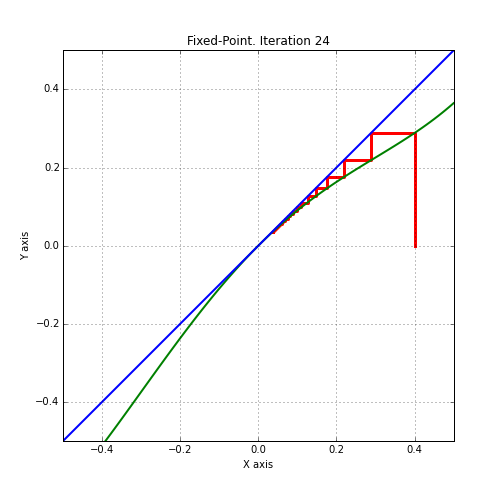
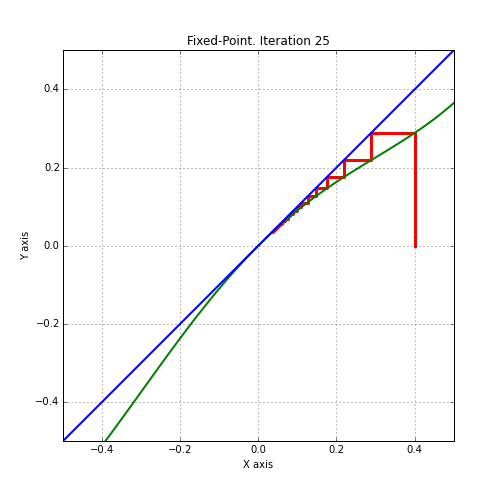
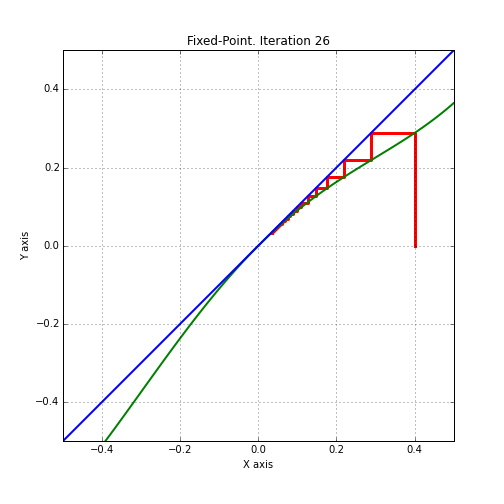
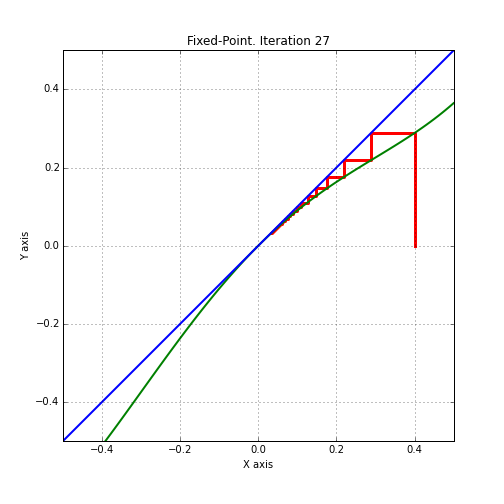
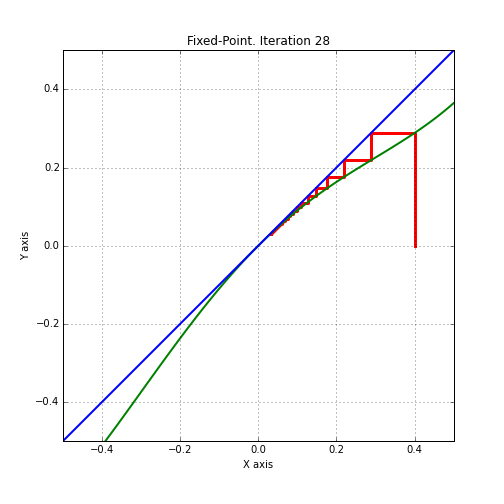
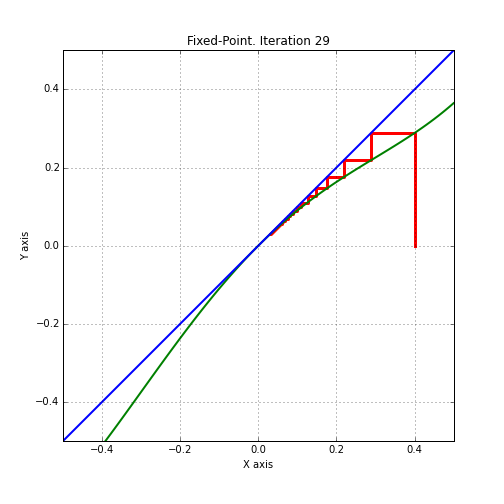
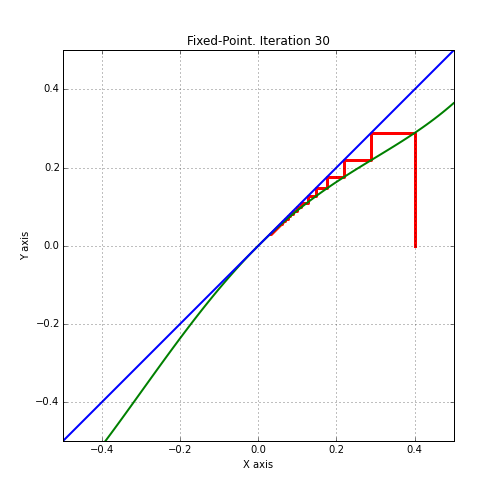
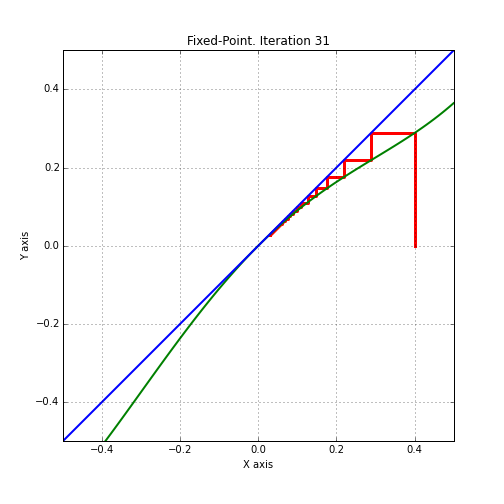
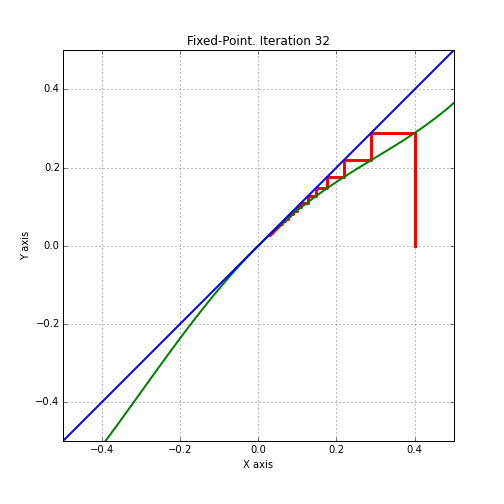
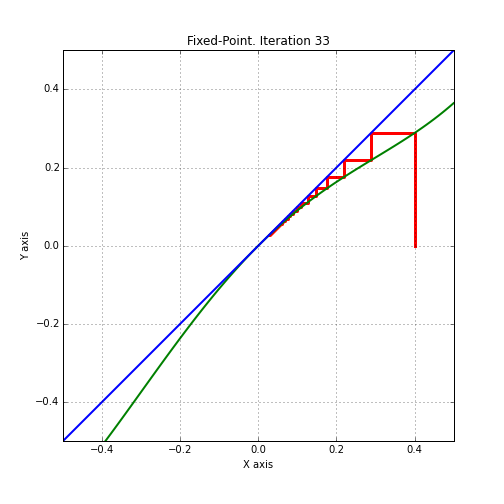
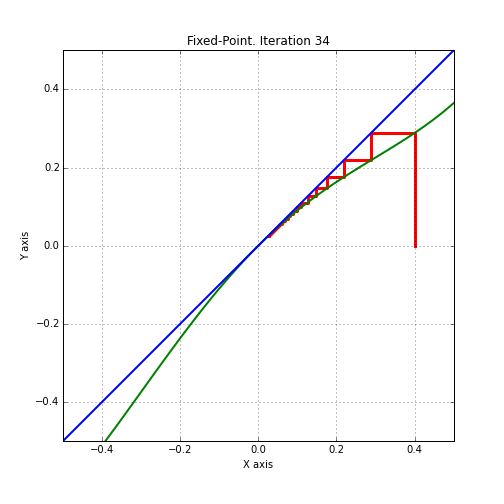
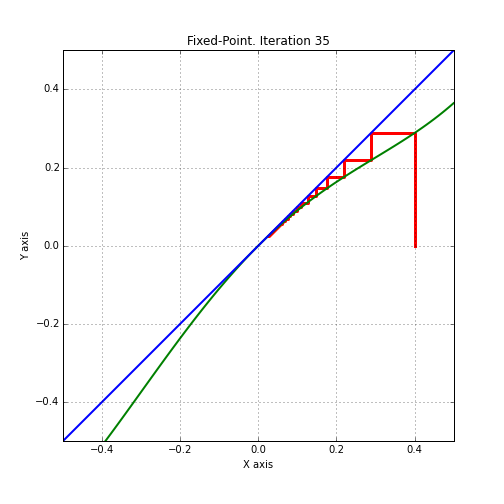
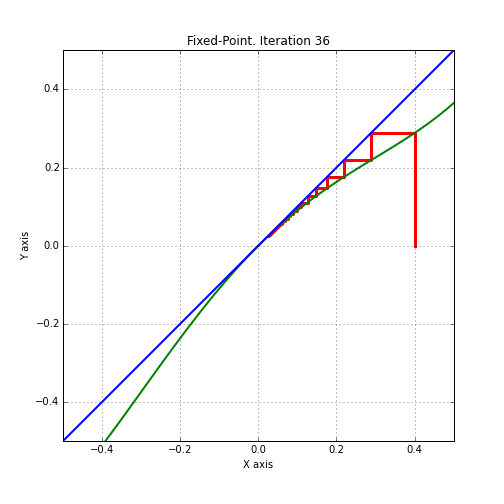
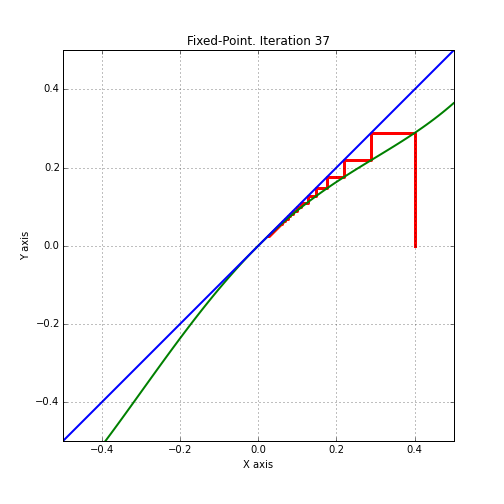
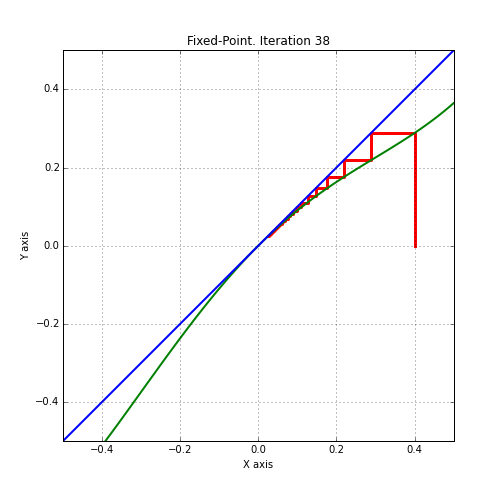
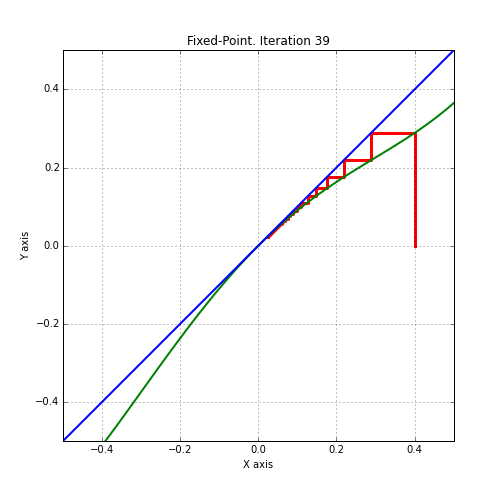
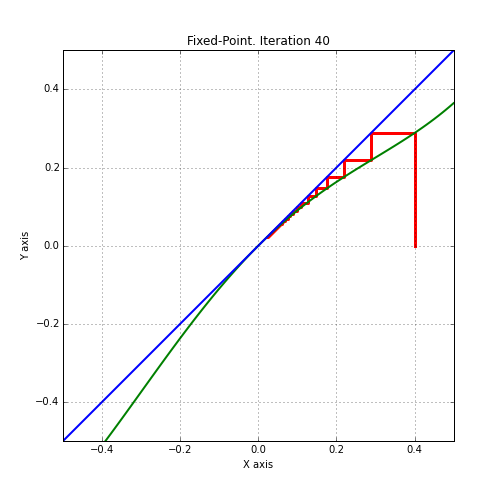
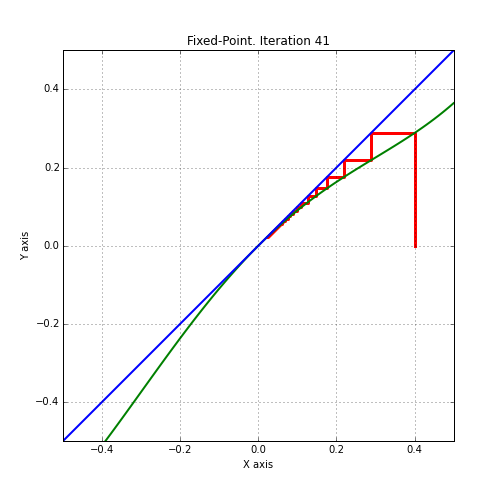
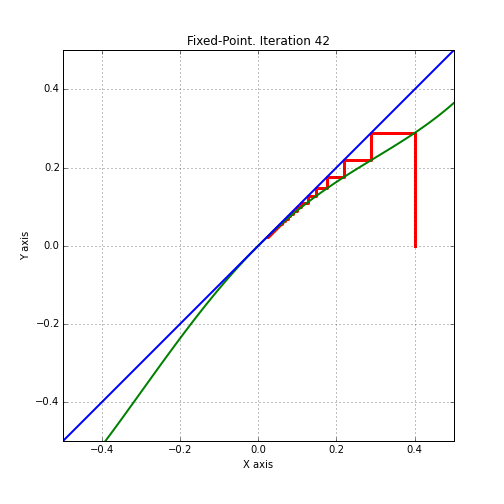
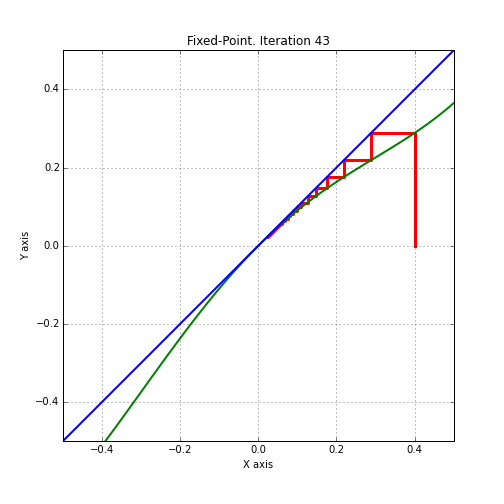
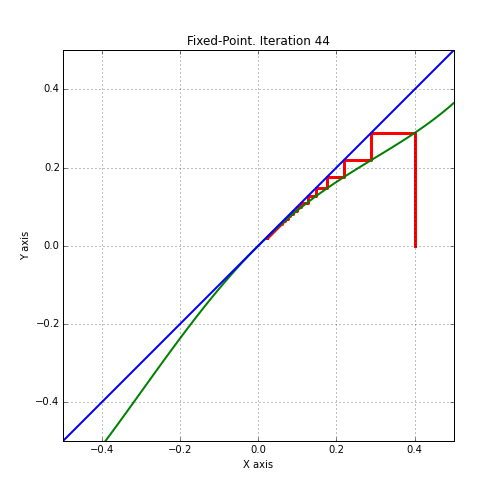
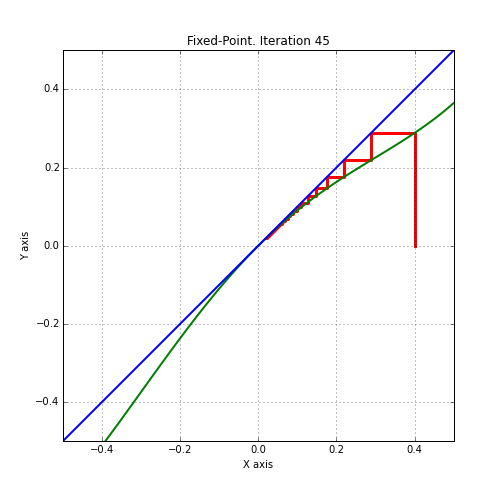
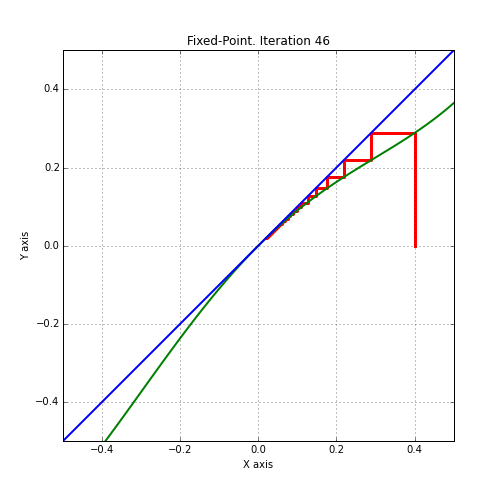
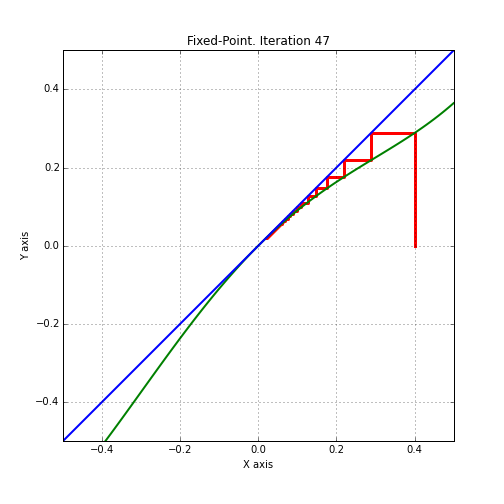
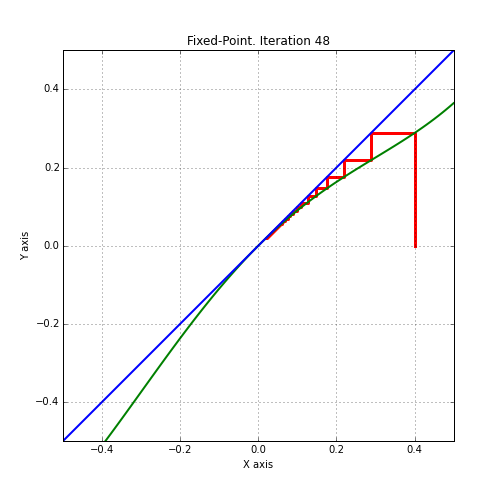
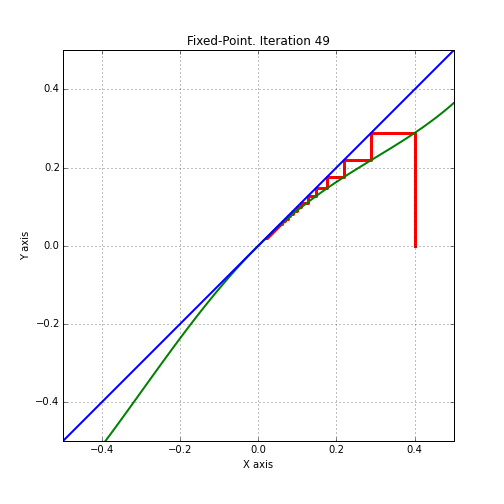

In [12]:
FixedPoint_Animation( f, pini = 0.4, Nmax = 50, xmin = -0.5, xmax = 0.5 )

## ACTIVITY FP

When a new planet is discovered, there are different methods to estimate its physical properties. Many times is only possible to estimate either the planet mass or the planet radius and the other property has to be predicted through computer modelling.

If one has the planet mass, a very rough way to estimate its radius is to assume certain composition (mean density) and a homogeneous distribution (a very bad assumption!). For example, for the planet [Gliese 832c](http://es.wikipedia.org/wiki/Gliese_832_c) with a mass $M= 5.40 M_{\oplus}$, if we assume an earth-like composition, i.e. $\bar \rho_{\oplus} = 5520\ kg/m^3$, we obtain:

$$R_{g832c} = \left( \frac{3 M_{g832c}}{ 4 \pi \bar\rho_{\oplus} } \right)^{1/3} \approx 1.75 R_{\oplus}$$

That would be the planet radius if the composition where exactly equal to earth's.

A more realistic approach is assuming an internal one-layer density profile like:

$$\rho(r) = \rho_0 \exp\left( -\frac{r}{L} \right)$$

where $\rho_0$ is the density at planet centre and $L$ is a characteristic lenght depending on the composition. From numerical models of planet interiors, the estimated parameters for a planet of are $M= 5.40 M_{\oplus}$ are approximately $\rho_0 = 18000\ kg/m^3$ and $L = 6500\ km$.

Integrating over the planet volume, we obtain the total mass as

$$M = 4\pi \int_0^R \rho(r)r^2dr$$

This is a function of the mass in terms of the planet radius. 

Solving the equation $M(R) = M_{g832c}$ it would be possible to find a more realistic planet radius. However when using numerical models, it is not possible to approach the solution from the left side as a negative mass makes no sense.

<font color='red'>    
In an IPython notebook, solve the previous problem and find the radius of **Gliese 832c** using your own version of the Fixed-point iteration algorithm.
</font>

- - -

# Newton-Raphson Method

Although Fixed-point iteration is an efficient algorithm as compared with Bisection, the Newton-Raphson method is an acceletared convergent scheme where the roots of a function are easily found with just a few iterations.

## Derivation NM

Although this method can be presented from an algorithmic point of view, the mathematical deduction is very useful as it allows us to understand the essence of the approximation as well as estimating easily the convergence errors.

Let be $f(x)$ a continuous and differentiable function defined within an interval $[a,b]$ (i.e. $f\in \mathcal{C}^2[a,b]$), and $p$ is a root of the function such that $f(p) = 0$. If we give an initial an enough close guess $p_0$ to this root, such that $|p-p_0|<\epsilon$, where $\epsilon$ is adequately small, we can expand the function by using a second order taylor serie, yielding:

$$f(p) = f(p_0) + (p-p_0)f'(p_0) + \frac{(p-p_0)^2}{2}f''(p_0) + \mathcal{O}^3(|p-p_0|)$$

but as $f(p) = 0$ and $|p-p_0|^2<\epsilon^2$ is an even smaller quantity, we can readily neglect from second order terms, obtaining

$$p \approx p_0 - \frac{f(p_0)}{f'(p_0)} \equiv p_1$$

If we repeat this process but now using $p_1$ as our guess to the root instead of $p_0$ we shall obtain:

$$p \approx p_1 - \frac{f(p_1)}{f'(p_1)} \equiv p_2$$

and so...

$$p \approx p_n - \frac{f(p_n)}{f'(p_n)} \equiv p_{n+1}$$

where each new iteration is a better approximation to the real root.

## Steps NM

1. Take your function $f(x)$ and derive it, $f'(x)$.
2. Give a guest to the solution (root of $f(x)$). This value would be the seed $p_0$.
3. The next guest to the solution will be given by

    $$p_{n+1} = p_n - \frac{f(p_n)}{f'(p_{n+1})}$$

4. If the stop condition is not satisfied, then repeat step 3.
5. The End!

In [13]:
#Defining Newton Method
def NewtonRaphson_Animation( f, fp, pini, Nmax, xmin, xmax ):
    #Initial condition
    p = [pini,]
    p_dash = []
    p_der = []
    #Iterations
    for n in xrange(Nmax):
        p.append( p[n] - f(p[n])/fp(p[n]) )
        p_dash.append( p[n] )
        p_dash.append( p[n] )
        p_der.append( 0 )
        p_der.append( f(p[n]) )
    
    p = np.array( p )
    p_dash = np.array( p_dash )
    p_der = np.array( p_der )
    
    print "Result:", p[-1]
    
    #Array X-axis
    X = np.linspace(xmin,xmax,100)
    
    #Initializing Figure
    fig = plt.figure( figsize=(7,7) )
    ax = fig.add_subplot(111)
    #Graphic iterations
    dash, = ax.plot( [], [], "--", color="gray", linewidth = 2 )
    derivative, = ax.plot( [], [], color="red", linewidth = 3 )
    #Function f
    ax.plot( X, f(X), color="green", linewidth = 2 )
    #Horizontal line
    ax.hlines( 0, xmin,xmax, color="black", lw = 2 )
    ax.grid(True)
    ax.set_xlim( (xmin, xmax) )
    ax.set_xlabel( "X axis" )
    ax.set_ylabel( "Y axis" )
    ax.set_title( "Fixed-Point iteration" )
        
    def init():
        dash.set_data([], [])
        derivative.set_data([], [])
        return dash, derivative
    
    def animate(i):
        #Setting new data
        dash.set_data( p_dash[:2*i+2], p_der[:2*i+2] )
        derivative.set_data( p_dash[2*i+1:2*i+3], p_der[2*i+1:2*i+3] )
        ax.set_title( "Newthon-Raphson Method. Iteration %d"%i )
        return dash, derivative
    
    return animation.FuncAnimation(fig, animate, init_func=init,frames=Nmax, interval=500, blit=True)

## Example 5

Find one root of the function:

$f(x) = x^2 - x$

with derivative

$f'(x) = 2x -1$

using the Newton-Raphson method.

Result: 1.0



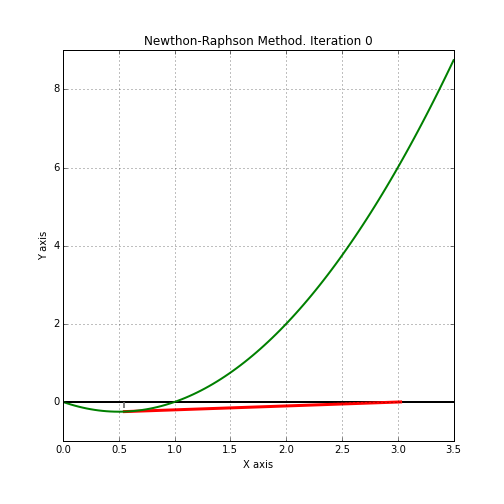
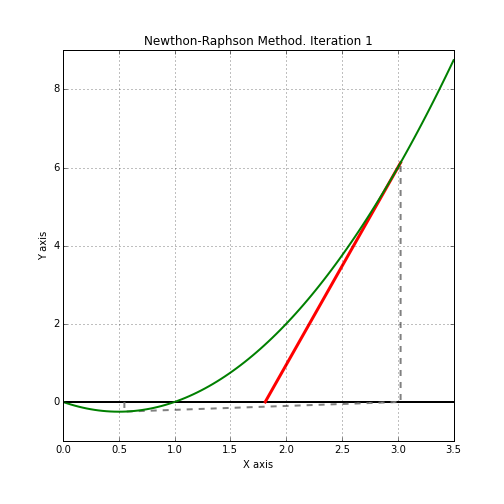
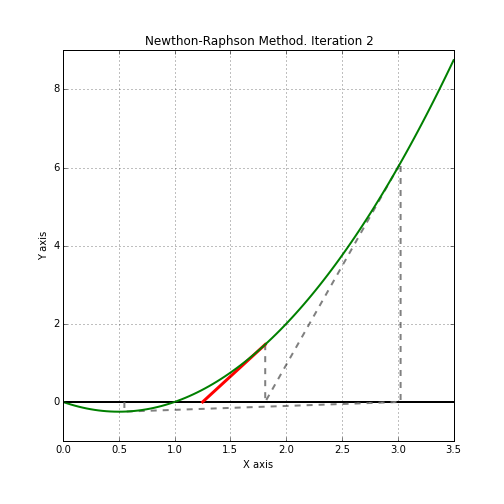
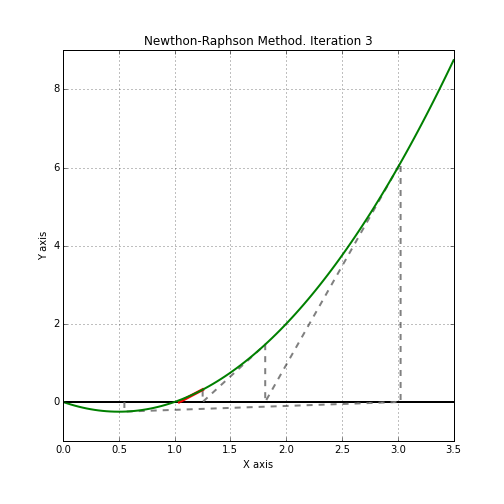
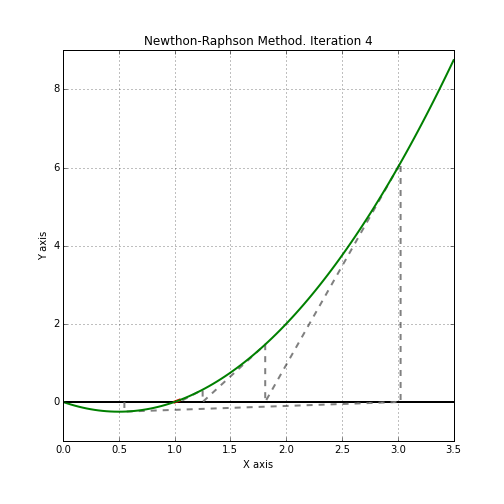
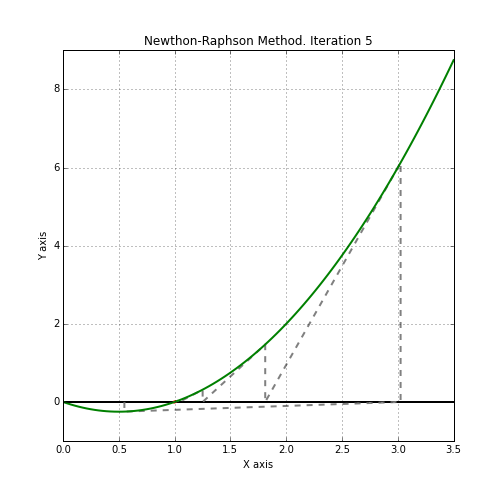
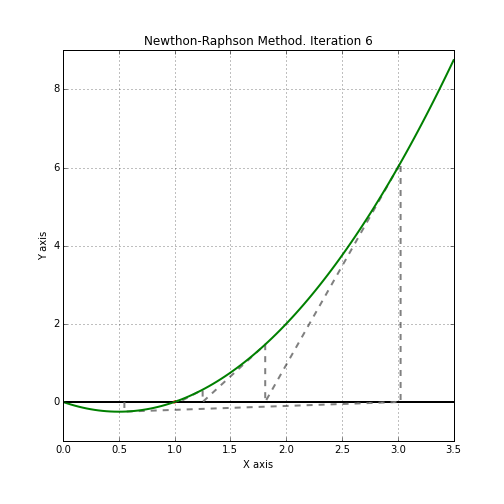
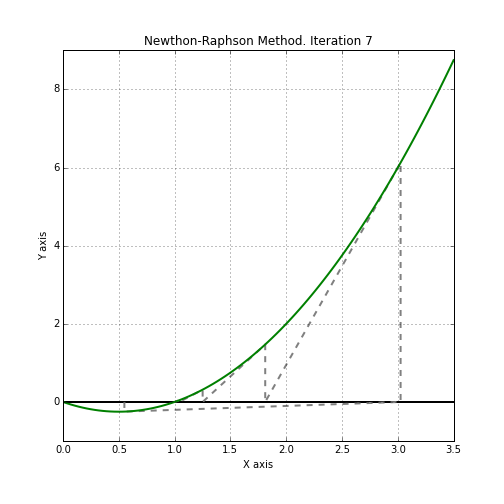
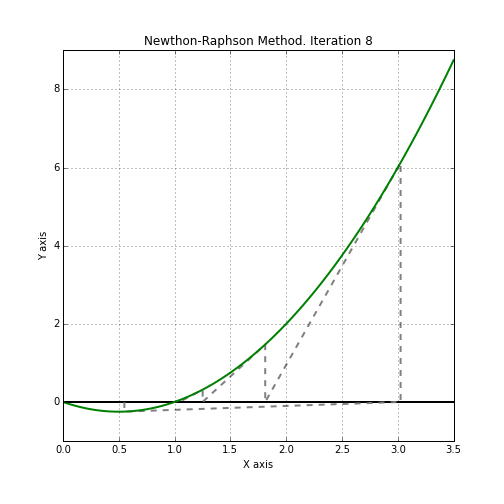
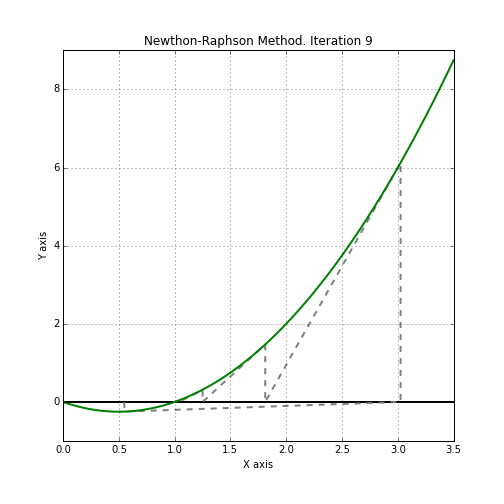

In [14]:
#Defining the function
def f(x): 
    return x**2-x
#Defining the derivative
def df(x): 
    return 2*x-1
#Calculating root
NewtonRaphson_Animation( f, df, pini = 0.55, Nmax = 10, xmin = 0, xmax = 3.5 )

## Stop conditions NM

The stop conditions are the same than Bisection and Fixed-point iteration:

* A fixed distance between the last two steps (absolute convergence):

    $$|p_i - p_{i-1}|<\epsilon$$

* A fixed relative distance between the last two steps (relative convergence):

    $$\frac{|p_i - p_{i-1}|}{|p_i|}<\epsilon\ \ \ \ \ p_i \neq 0$$

* Function tolerance:

    $$f(p_i)< \epsilon$$

* Computational stop:

    If $N>N_{max}$, stop!

## Convergence NM

It is possible to demonstrate by means of the previous derivation procedure, that the convergence of the Newton-Raphson method is quadratic, i.e., if $p$ is the exact root and $p_n$ is the $n$-th iteration, then

$$|p_{n+1}-p|\leq C |p_n-p|^2$$

for a fixed ans positive constant $C$.

This implies, if the initial guess is good enough such that |p_0-p| is small, the convergence is achieved very fast as each iteration improves the precision twice in the order of magnitude, e.g., if $|p_0-p|\sim 10^{-1}$, $|p_1-p|\sim 10^{-2}$, $|p_2-p|\sim 10^{-4}$, $|p_2-p|\sim 10^{-8}$ and so.

In [15]:
#Defining Newton Method
def NewtonRaphson( f, fp, pini, Nmax ):
    #Initial condition
    p = pini
    #Iterations
    for n in xrange(Nmax):
        p = p - f(p)/fp(p)
    #Final result
    return p

<font color='red'>
**ACTIVITY**
    
In an IPython notebook, copy the latter routine NewtonRaphson and the Bisection routine provided in this notebook (*and if you have it already, the Fixed-point iteration routine as well*) and find the root of the next function using all the methods.
    
$f(x) = x - \cos(x)$
    
Plot in the same figure the convergence of each method as a function of the number of iterations.
</font>

- - -

# Secant Method

The Newton-Raphson method is highly efficient as the convergence is accelerated, however there is a weakness with it: one needs to know the derivative of the function beforehand. This aspect may be complicated when dealing with numerical functions or even very complicated analytical functions. Numerical methods to derive the input function can be applied, but this extra procedure may involve an extra computing time that compensates the time spent by using other methods like Bisection.

## Derivation SM

Retaking the iterative expression obtained from the Newton-Raphson method:

$$p_{n+1} = p_n - \frac{f(p_n)}{f'(p_{n+1})}$$

the derivative can be approximated as

$$f'(p_n) = \lim_{x\rightarrow p_n} \frac{f(x)-f(p_n)}{x-p_n} $$

As we know, the convergence of the NR method is quadratic, so $p_{n-1}$ should be close enough to $p_n$ such that one can assume $p_{n-1}\rightarrow p_n$ and the previous term is:

$$f'(p_n) \approx \frac{f(p_{n})-f(p_{n-1})}{p_{n}-p_{n-1}} $$

The final expression for the $n$-th iteration of the root is then:

$$p_n = p_{n-1} - \frac{ f(p_{n-1})(p_{n-1}-p_{n-2}) }{f(p_{n-1})-f(p_{n-2})}$$

In this consists the Secant method, what is just an approximation to the Newton-Raphson method, but without the derivative term.

## Steps SM

1. Give the input function $f(x)$.
2. Give two guests to the solution (root of $f(x)$). These values would be the seeds $p_0$, $p_1$.
3. The next guest to the solution will be given by

    $$p_n = p_{n-1} - \frac{ f(p_{n-1})(p_{n-1}-p_{n-2}) }{f(p_{n-1})-f(p_{n-2})}$$

4. If the stop condition is not satisfied, then repeat step 3.
5. The End!

<font color='red'>
**ACTIVITY**
    
In an IPython notebook and based on the routine NewtonRaphson, write your own routine SecantMethod that performs the previous steps for the Secant Method. Test your code with the function $f(x)$:
    
$f(x) = x - \cos(x)$
</font>

**ACTIVITY**


It is known that light rays are deflected when they pass near by a gravitational field and that this deviation is proportional to the body mass which the light is interacting with and inversely proportional to the passing distance. 
Since it is common finding very massive structures in the universe and the measures that are done to study it involve photons, it makes sense to study what happens to a light source image when the rays get close to a grumpy object like a dark matter halo.  


In order to study the light deflection in these cases, it will be used the simplest model, gravitational lens theory, where the len is a very massive object. A sketch of a typical system is shown in the figure below. The source plane is the light source or image that is going to be affected,  $\eta$ is the distance from a image point to the line of sight and $\beta$ the subtended angle by the point. 
The lens plane corresponds to the mass that affects the light coming from the source, $\xi$ is the new image point distance to the line of sight, $\theta$ is the subtended angle by the new point position. Then, $\alpha$ is the deflection angle. 

Since from observations $\theta$ is known, the problem to be solved per pixel usually is 

\begin{equation}
\beta = \theta - \hat{\alpha}(\theta) 
\end{equation}

but $\alpha$ also depends on $\theta$ besides the len halo properties. This would allow construct the real image
from the distorted and magnified one. 

<img src="./figures/lente1.png">

This equation can also be written in terms of distances 

\begin{equation}
\vec{\eta}  = \frac{D_s}{D_d} \vec{\xi} - D_{ds}\alpha ( \vec{\xi }) 
\end{equation}

The solution to the lens equation is easier to get if it is assumed that the len is axially symmetric. In this case, the deflection angle  takes the next form

$$ \hat{\alpha}(\vec{\xi}) = \frac{\vec{\xi}}{|\vec{\xi}|^2} \frac{8G\pi}{c^2} \int_0^\xi d\xi'\xi'\Sigma(\xi')$$

The quantity $\Sigma$ is the surface mass density, i.e., the len's mass enclosed inside $\xi$ circle per area unit.  
It is important to notice that the direction of $\alpha$ is the same as $\xi$ and consequently $\eta$. 


The problem to be solved is the next: Given the positions of a square find the image distorsion due to gravitational lensing, i.e., find the root of \xi in the trascendal equation it satisfies. Use the routines given below and all of 
the data for the len and image that is going to be distorted. 


In [22]:
#Superficial density of the lens
def Sup_density(radio):
    return radio*M*len(r[r<radio])/radio**2.

#Deviation angle due to the gravitational len
def des_angle( radio ):
    return 2*np.pi*4*G*integrate.quad( Sup_density ,0, radio )[0]/(radio*c**2)

#Len equation
def Len_equation(radio, eta):
    return eta - Ds*radio/Dd - Dds*des_angle( radio )


In [17]:
# Len distribution generated 
M = 3e7
L = 1e5
puntos = 6
Ds = 1000
Dd = 900
Dds = Ds - Dd
G = 4.302e-3# pc M_sun**-1(km/s)**2
c = 3e6 # km/s 
x = np.linspace(0,L,puntos)
y = np.linspace(0,L,puntos)
X,Y = np.meshgrid(x,y)
#Generating meshgrid of points 
X = np.reshape(X,puntos*puntos)
Y = np.reshape(Y,puntos*puntos)
r = np.sqrt(X**2 + Y**2)

#Image to be distorted
Li = 5
ni = 8
X0 = np.linspace(-Li,Li,ni)
Y0 = np.linspace(-Li,Li,ni)
#Generating meshgrid of points 
X0,Y0 = np.meshgrid(X0,Y0)
r0 = np.sqrt( X0**2 + Y0**2 )
theta = np.zeros((ni,ni))
epsilon = np.zeros((ni,ni))

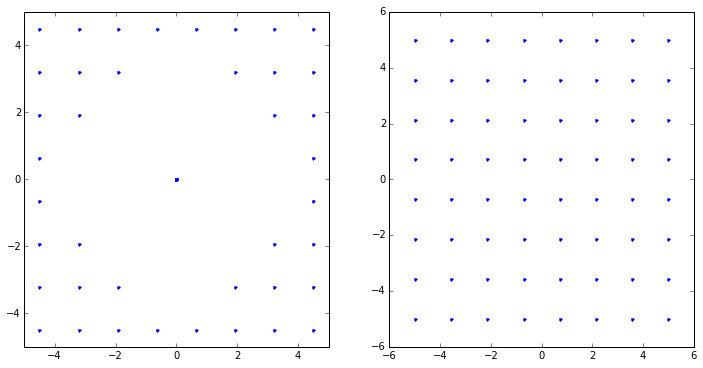

In [21]:
xc = epsilon*np.cos(theta)
yc = epsilon*np.sin(theta)
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(xc,yc,'b.');
plt.subplot(1,2,2)
plt.plot(X0,Y0,"b.");